In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import load_model
import tensorflow as tf
import neurokit2 as nk
model=load_model("models/bestmodelall.h5")

model.summary()

In [2]:
def peak_detector(file_path,sampled_rate):
    file=pd.read_csv(file_path)
    file=file.iloc[:,1]
    _, rpeaks = nk.ecg_peaks(file, sampling_rate=sampled_rate)
    return rpeaks['ECG_R_Peaks']

In [3]:
def self_annotator(file_path,peaks,patient):
    
    patient=str(patient)
    directory="mid-evaluation-photos"
    record=pd.read_csv(file_path)
    Sample=peaks
    try:
        for l in range(len(Sample-1)):
            signal=record.iloc[Sample[l]:Sample[l+1],1]
            fig = plt.figure(frameon=False)
            plt.plot(signal) 
            plt.xticks([]), plt.yticks([])
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            filename = directory +"/"+patient+"_"+str(l)+".png"
            fig.savefig(filename)
            im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            im_gray = cv2.resize(im_gray, (128,128), interpolation = cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_gray)
            plt.close()
    except:
        pass

In [4]:
def predictor(image_path):
    name_list=os.listdir(image_path)
    dictionary={"fusion":0,"normal":0,"other":0,"sveb":0,"veb":0}
    destination_zero="classified/fusion"
    destination_one="classified/normal"
    destination_two="classified/other"
    destination_three="classified/sveb"
    destination_four="classified/veb"
    for name in name_list:
        filepath=os.path.join(image_path,name)
        image=cv2.imread(filepath)
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        gray=gray/255.0
        gray=gray.reshape(-1,128,128,1)
        hai=model.predict(gray)
        index=np.argmax(hai[0])
        if index==0:
            destination_path=os.path.join(destination_zero,name)
            shutil.copyfile(filepath,destination_path)
            dictionary["fusion"]+=1
        elif index==1:
            destination_path=os.path.join(destination_one,name)
            shutil.copyfile(filepath,destination_path)
            dictionary["normal"]+=1
        elif index==2:
            destination_path=os.path.join(destination_two,name)
            shutil.copyfile(filepath,destination_path)
            dictionary["other"]+=1
        elif index==3:
            destination_path=os.path.join(destination_three,name)
            shutil.copyfile(filepath,destination_path)
            dictionary["sveb"]+=1
        elif index==4:
            destination_path=os.path.join(destination_four,name)
            shutil.copyfile(filepath,destination_path)
            dictionary["veb"]+=1
        else:
            
            pass
        os.remove(filepath)
    return dictionary
        
        
    

In [5]:
csv_file="mitbih_database/200.csv"
peaks=peak_detector(csv_file,360)
self_annotator(csv_file,peaks,200)
filepath="mid-evaluation-photos"
output=predictor(filepath)
print(output)













{'fusion': 2, 'normal': 1624, 'other': 28, 'sveb': 30, 'veb': 922}


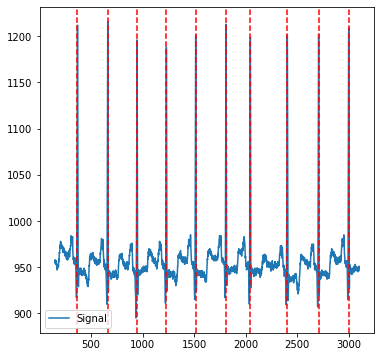

In [13]:
plt.rcParams['figure.figsize'] = [6, 6] # Bigger images
file=pd.read_csv("mitbih_database/100.csv")
file=file.iloc[:,1]
_, rpeaks = nk.ecg_peaks(file, sampling_rate=360)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:10], file[150:3100])
#plot = nk.events_plot(sample_index_array[:10], file[:3500])

In [27]:
rpeaks['ECG_R_Peaks']
df = pd.read_csv('mitbih_database/100annotations.txt', delimiter= '\s+',index_col=False) 
sample_index=df["Sample"]
sample_index_list=list(sample_index)

In [30]:
sample_index_array=np.array(sample_index_list)
sample_index_array

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [25]:
sample_index[2:],rpeaks['ECG_R_Peaks']

(2          370
 3          662
 4          946
 5         1231
 6         1515
          ...  
 2269    648978
 2270    649232
 2271    649484
 2272    649734
 2273    649991
 Name: Sample, Length: 2272, dtype: int64,
 array([   370,    663,    947, ..., 649232, 649485, 649734]))

# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

#ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']

#ecg_signal

#ecg_signal.plot()

#_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=3000)

#rpeaks

# Visualize R-peaks in ECG signal
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

file=pd.read_csv("mitbih_database/100.csv")

file.columns

file=file.iloc[:,1]

_, rpeaks = nk.ecg_peaks(file, sampling_rate=360)

# Visualize R-peaks in ECG signal
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'], file)

# Zooming into the first 5 R-peaks
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], file[:20000])


plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:68], file[:20000])

In [4]:
def annotator(patient):
    directory="mid-evaluation-photos"
    record=pd.read_csv("mitbih_database/"+patient+".csv")
    df = pd.read_csv("mitbih_database/"+patient+"annotations.txt", delimiter= '\s+',index_col=False)
    Sample=df["Sample"]
    Symbol=df["#"]
    try:
        for l in range(len(Sample-1)):
            signal=record.iloc[Sample[l]:Sample[l+1],1]
            fig = plt.figure(frameon=False)
            plt.plot(signal) 
            plt.xticks([]), plt.yticks([])
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            filename = directory +"/"+patient+"_"+str(l)+".png"
            fig.savefig(filename)
            im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            im_gray = cv2.resize(im_gray, (128,128), interpolation = cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_gray)
            plt.close()
    except:
        pass